# Inferential Statistics
## Business Stock Prices Comparison


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel
from sklearn import preprocessing

In [2]:
# Load the data from the csv files
df_loreal = pd.read_csv('../Data/loreal_stock_price.csv',parse_dates=['Date'], index_col='Date')
df_unilever = pd.read_csv('../Data/unilever_stock_price.csv',parse_dates=['Date'], index_col='Date')
df_estee_lauder = pd.read_csv('../Data/estee_stock_price.csv',parse_dates=['Date'], index_col='Date')

In [3]:
# Pick the closing prices
loreal_close = df_loreal['Close']
unilever_close = df_unilever['Close']
estee_close = df_estee_lauder['Close']

In [4]:
# Use the MinMaxScaler to scale the data - Data Normalization
scaler = preprocessing.MinMaxScaler()
loreal_close_scaled = scaler.fit_transform(loreal_close.values.reshape(-1, 1))
unilever_close_scaled = scaler.fit_transform(unilever_close.values.reshape(-1, 1))
estee_close_scaled = scaler.fit_transform(estee_close.values.reshape(-1, 1))

In [5]:
# Convert the scaled data to pandas Series
loreal_close_scaled = pd.Series(loreal_close_scaled.flatten(), index=loreal_close.index)
unilever_close_scaled = pd.Series(unilever_close_scaled.flatten(), index=unilever_close.index)
estee_close_scaled = pd.Series(estee_close_scaled.flatten(), index=estee_close.index)

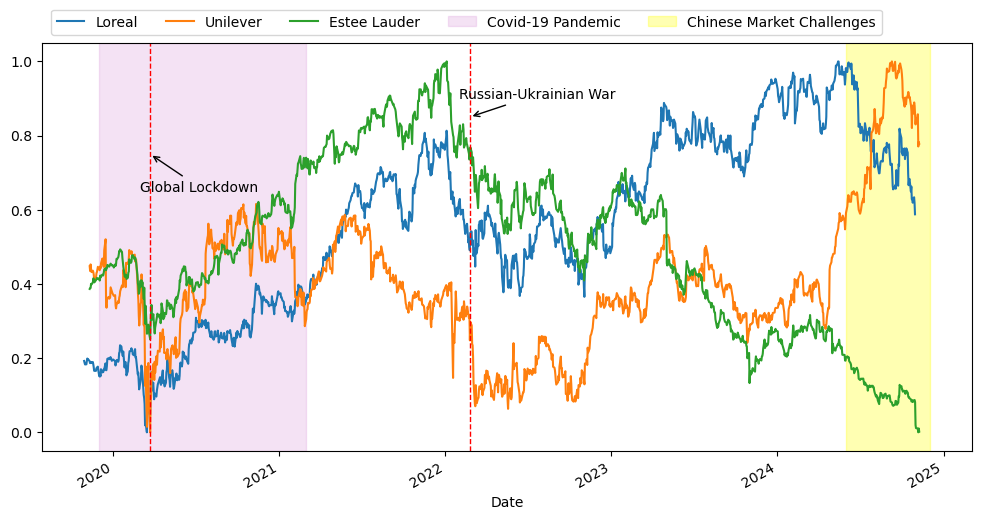

In [6]:
# Plot the brands closing prices
fig, ax = plt.subplots(figsize=(12, 6))
loreal_close_scaled.plot(label='Loreal')
unilever_close_scaled.plot(label='Unilever')
estee_close_scaled.plot(label='Estee Lauder')

# Add shaded regions to the plot
start_date = '2019-12-01'
end_date = '2021-03-01'
ax.axvspan(start_date, end_date, color='plum', alpha=0.3, label='Covid-19 Pandemic')

war_declared = '2022-02-24'
ax.axvline(x=war_declared, color='red', linestyle='--', linewidth=1)
ax.annotate('Russian-Ukrainian War', xytext=('2022-02-01', 0.9), xy=(war_declared, 0.85), arrowprops=dict(facecolor='red', arrowstyle='->'))
# add key events
ax.axvline(x='2020-03-23', color='red', linestyle='--', linewidth=1)
ax.annotate('Global Lockdown', xytext=('2020-03-01', 0.65), xy=('2020-03-23', 0.75), arrowprops=dict(facecolor='red', arrowstyle='->'))

plummet_chinese_market = '2024-06-01'
plummet_chinese_market_end = '2024-12-01' # until now
ax.axvspan(plummet_chinese_market, plummet_chinese_market_end, color='yellow', alpha=0.3, label='Chinese Market Challenges')
plt.legend(bbox_to_anchor=(0.01, 1.02), loc='lower left', borderaxespad=0, ncols=5)
plt.show()

## Independent T-Test

### Interpretation
- **Null Hypothesis (H0):** The mean of the scaled closing prices of L'Oréal is less than or equal to the mean of the scaled closing prices of Unilever.

- **Alternative Hypothesis (H1):** The mean of the scaled closing prices of L'Oréal is greater than the mean of the scaled closing prices of Unilever (specified by the alternative='greater' parameter).

In [7]:
ttest_ind(loreal_close_scaled, unilever_close_scaled, alternative='greater', equal_var=False)

Ttest_indResult(statistic=19.146394528201444, pvalue=1.9549703856186198e-76)

### Result Breakdown
- **t-statistic: 19.146394528201444**: A high t-statistic (like 19.146) suggests a substantial difference between the two sets of scaled closing prices.

- **p-value: 1.9549703856186192e-76**: The p-value here is extremely small (essentially zero), which means the likelihood of these results occurring by chance is almost nonexistent. The p-value here is used to reject the null hypothesis.

- **df (degrees of freedom): 2389.641418771853**: In this case, it shows the adjusted count of data points that can vary given the sample sizes and variance. A higher df means more data points, providing more robustness to your statistical test.

### Interpretation
- **Null Hypothesis (H0):** The mean of the scaled closing prices of L'Oréal is less than or equal to the mean of the scaled closing prices of Este Laude.

- **Alternative Hypothesis (H1):** The mean of the scaled closing prices of L'Oréal is greater than the mean of the scaled closing prices of Este Laude (specified by the alternative='greater' parameter).

In [8]:
ttest_ind(loreal_close_scaled, estee_close_scaled, alternative='greater', equal_var=False)

Ttest_indResult(statistic=6.751506214347406, pvalue=9.03439844717611e-12)

### Result Breakdown
- **t-statistic: 6.751506214347406**: A high t-statistic suggests a substantial difference between the two sets of scaled closing prices.

- **p-value: 9.03439844717611e-12**: The p-value here is extremely small (essentially zero), which means the likelihood of these results occurring by chance is almost nonexistent. The p-value here is used to reject the null hypothesis.

- **df (degrees of freedom): 2538.957492877964**: In this case, it shows the adjusted count of data points that can vary given the sample sizes and variance. A higher df means more data points, providing more robustness to your statistical test.

---

## Paired T-Test

In [9]:
# Convert the index to datetime (date only)
# Thisi is used to join datasets on the date
loreal_close_scaled.index = pd.to_datetime(loreal_close_scaled.index, utc=True)
loreal_close_scaled.index = pd.to_datetime(loreal_close_scaled.index.date)

unilever_close_scaled.index = pd.to_datetime(unilever_close_scaled.index, utc=True)
unilever_close_scaled.index = pd.to_datetime(unilever_close_scaled.index.date)

estee_close_scaled.index = pd.to_datetime(estee_close_scaled.index, utc=True)
estee_close_scaled.index = pd.to_datetime(estee_close_scaled.index.date)

In [10]:
# Join the datasets
loreal_unilever_join = pd.concat([loreal_close_scaled, unilever_close_scaled], axis=1, join='inner')
loreal_unilever_join.columns = ['Loreal', 'Unilever']

loreal_estee_join = pd.concat([loreal_close_scaled, estee_close_scaled], axis=1, join='inner')
loreal_estee_join.columns = ['Loreal', 'Estee Lauder']

In [11]:
ttest_rel(loreal_unilever_join['Loreal'], loreal_unilever_join['Unilever'])

TtestResult(statistic=19.834189603997295, pvalue=5.7278651866218665e-74, df=989)

In [12]:
ttest_rel(loreal_estee_join['Loreal'], loreal_estee_join['Estee Lauder'])

TtestResult(statistic=5.493636596607645, pvalue=5.007885286451241e-08, df=989)

The paired T-test gives similar result to independent T-test, which suggests that even when taking into account the day-to-day pairing, the significant difference remains consistent. The agreement between the two tests enhances the confidence that the differences in stock prices are genuine and not artifacts of the test method.

## Conclusion
When compared to its two major competitors, Unilever and Estée Lauder, L'Oréal's mean normalized stock prices stand out as significantly higher. This indicates a relatively high level of investor trust in L'Oréal, underscoring its strong leadership position in the European cosmetics industry.